In [2]:
# !pip install stable-retro
# !pip install "stable-baselines3[extra]>=2.0.0a4"
# !pip install opencv-python

In [3]:
from common.fighter_envs import StreetFighter
from common.wrappers import train_model_dqn
from common.evaluate import *
from common.utils import build_all_permutations, save

import pandas as pd
import numpy as np

In [4]:
!python3 -m retro.import roms

Importing StreetFighterIISpecialChampionEdition-Genesis
Imported 1 games


### Baseline testing for the untrained model.

We want to see the kind of results we could expect if the model was completely untrained. Since the model behaves deterministically in the evaluation process for each seed ,(i.e., will have the exact same evaluation outcomes), we will instead train 400 models for each policy option, with random seeds and, 1 evaluation episode for each model. Afterwards, we will calculate the mean results to get a baseline. We'll also test each evaluation policy to see if there's a difference in time, or outcomes between the two.

In [5]:
np.random.seed(2)

In [ ]:
random_seeds = [np.random.randint(1, 1000) for i in range(400)]
random_seeds

In [7]:
model_ops_1 = {
              'policy': ['MlpPolicy'],
              'buffer_size': [500_000],
              'seed': random_seeds
              }

In [8]:
model_ops_2 = {
              'policy': ['CnnPolicy'],
              'buffer_size': [500_000],
              'seed': random_seeds
              }

In [9]:
all_model_ops = build_all_permutations(model_ops_1) + build_all_permutations(model_ops_2)
all_model_ops, len(all_model_ops)

([{'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 169},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 528},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 494},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 585},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 535},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 300},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 467},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 76},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 361},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 264},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 675},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 434},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 608},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 588},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 726},
  {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed':

In [10]:
image_list = []
recorder = {}
policy_list = ['MlpPolicy', 'CnnPolicy']
n_eval_episodes = 1
trial = 1

SAVE_DIR = './results/baseline_test_1_eval.pkl'

In [11]:
for model_ops in all_model_ops:

        print(f'Trial: {trial} out of {len(all_model_ops)}')
        print(model_ops)

        mean, std, total, time_in_minutes, info = train_model_dqn(StreetFighter, model_ops, total_timesteps=0, n_eval_episodes = 1, ev_func='alt', plot=True)
        steps = info[0][0][-1]

        add_to_recorder(recorder, {'mean':mean, 'std':std, 'total':total, 'time in minutes': time_in_minutes, 'steps':steps})
        add_to_recorder(recorder, model_ops)
        image_list.append(info)

        if  trial % 25 == 0:
            results_df = pd.DataFrame.from_dict(recorder)
            results_df.to_pickle(SAVE_DIR)

        trial += 1
        print()

Trial: 1 out of 800
{'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 169}
Learning...
Evaluating...

Trial: 2 out of 800
{'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 528}
Learning...
Evaluating...

Trial: 3 out of 800
{'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 494}
Learning...
Evaluating...

Trial: 4 out of 800
{'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 585}
Learning...
Evaluating...

Trial: 5 out of 800
{'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 535}
Learning...
Evaluating...

Trial: 6 out of 800
{'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 300}
Learning...
Evaluating...

Trial: 7 out of 800
{'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 467}
Learning...
Evaluating...

Trial: 8 out of 800
{'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 76}
Learning...
Evaluating...

Trial: 9 out of 800
{'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 361}
Learning...
Evaluating...

Trial: 10 out of 800
{'policy': 'MlpPo

In [12]:
results_df = pd.DataFrame.from_dict(recorder)
results_df.to_pickle(SAVE_DIR)
results_df.sort_values(('mean'), ascending=False).head(10)

,mean,std,total,time in minutes,steps,policy,buffer_size,seed
123,90800.0,0.0,90800,0.1148,8159,MlpPolicy,500000,988
367,83800.0,0.0,83800,0.2905,20979,MlpPolicy,500000,938
632,75100.0,0.0,75100,0.2216,9575,CnnPolicy,500000,46
511,61200.0,0.0,61200,0.2953,12549,CnnPolicy,500000,915
727,57300.0,0.0,57300,0.2132,9112,CnnPolicy,500000,768
551,57300.0,0.0,57300,0.2134,9112,CnnPolicy,500000,768
255,46600.0,0.0,46600,0.1335,9629,MlpPolicy,500000,924
502,45800.0,0.0,45800,0.4125,17539,CnnPolicy,500000,386
696,45700.0,0.0,45700,0.2077,8894,CnnPolicy,500000,498
670,45600.0,0.0,45600,0.1493,6228,CnnPolicy,500000,518


In [13]:
print('Mean: rewards, std, total rewards, time, and total steps for all policies.')
mean = pd.DataFrame(results_df[['mean', 'std', 'total', 'time in minutes', 'steps']].mean())
mean = mean.transpose()
mean.columns = ['Mean rewards', 'Mean std', 'Mean total rewards', 'Mean time in minutes', 'Mean total steps']
mean

Mean: rewards, std, total rewards, time, and total steps for all policies.


,Mean rewards,Mean std,Mean total rewards,Mean time in minutes,Mean total steps
0,3518.875,0.0,3518.875,0.122188,6404.93875


In [14]:
print('For Cnn Policy:')
cnn_df = results_df[results_df['policy'] == 'CnnPolicy']
mean = pd.DataFrame(cnn_df[['mean', 'std', 'total', 'time in minutes', 'steps']].mean())
mean = mean.transpose()
mean.columns = ['Mean rewards', 'Mean std', 'Mean total rewards', 'Mean time in minutes', 'Mean total steps']
mean

For Cnn Policy:


,Mean rewards,Mean std,Mean total rewards,Mean time in minutes,Mean total steps
0,3128.75,0.0,3128.75,0.151667,6363.3725


In [15]:
print('For Mlp Policy:')
mlp_df = results_df[results_df['policy'] == 'MlpPolicy']
mean = pd.DataFrame(mlp_df[['mean', 'std', 'total', 'time in minutes', 'steps']].mean())
mean = mean.transpose()
mean.columns = ['Mean rewards', 'Mean std', 'Mean total rewards', 'Mean time in minutes', 'Mean total steps']
mean

For Mlp Policy:


,Mean rewards,Mean std,Mean total rewards,Mean time in minutes,Mean total steps
0,3909.0,0.0,3909.0,0.092708,6446.505


In [16]:
from classes.utils import save_images_as_dict, save

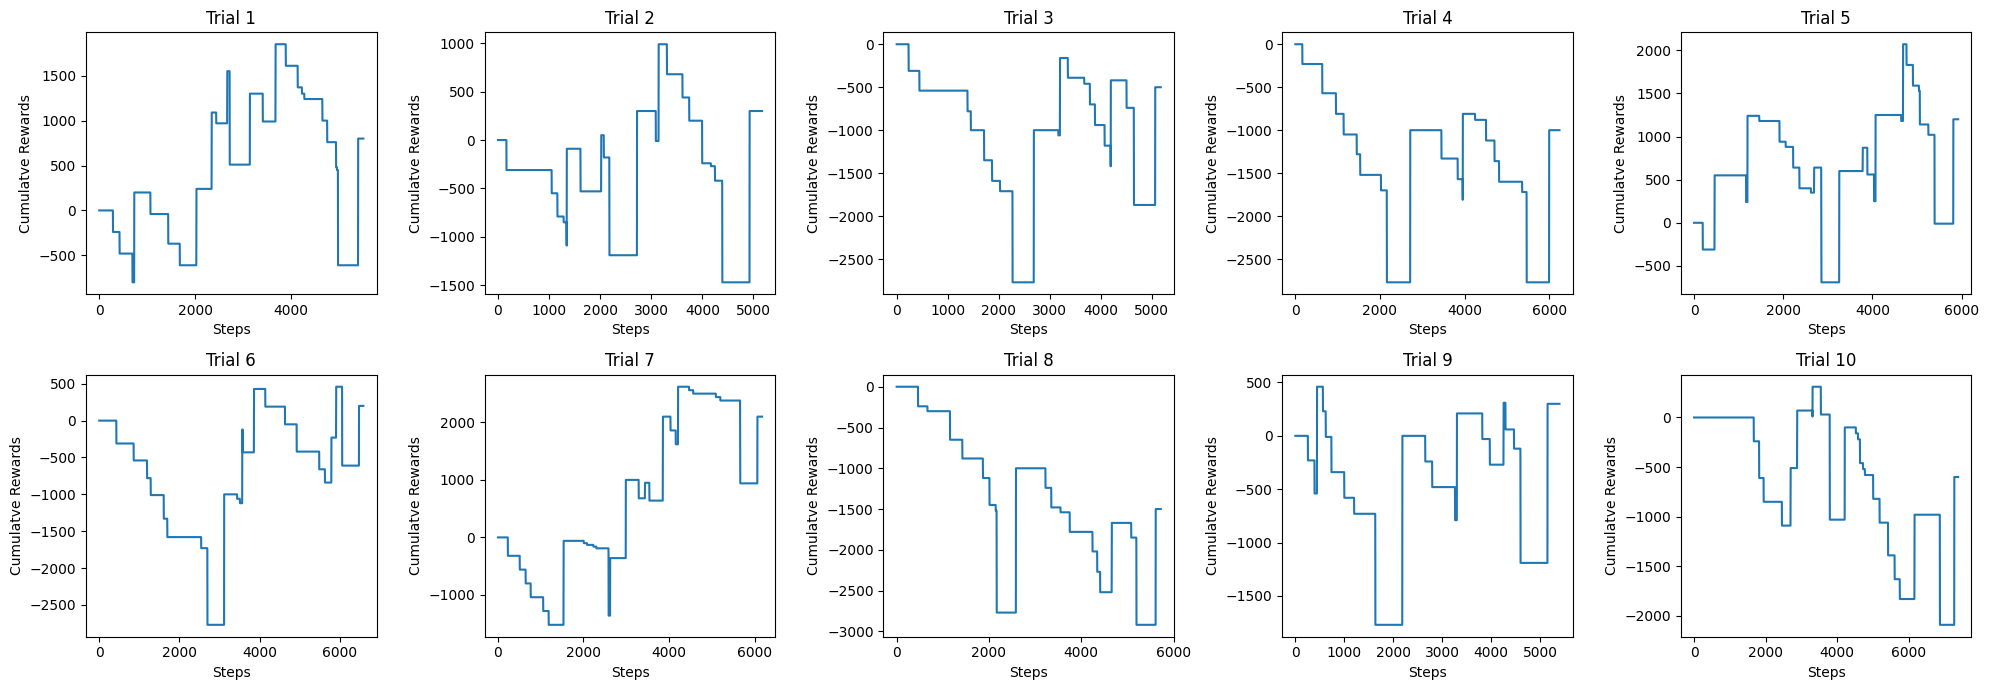

In [17]:
eval_subplots(num_plots = 10, image_list = image_list, num_cols=5, figsize=(20, 7))

In [18]:
plt.rcParams['figure.figsize'] = (16, 8)

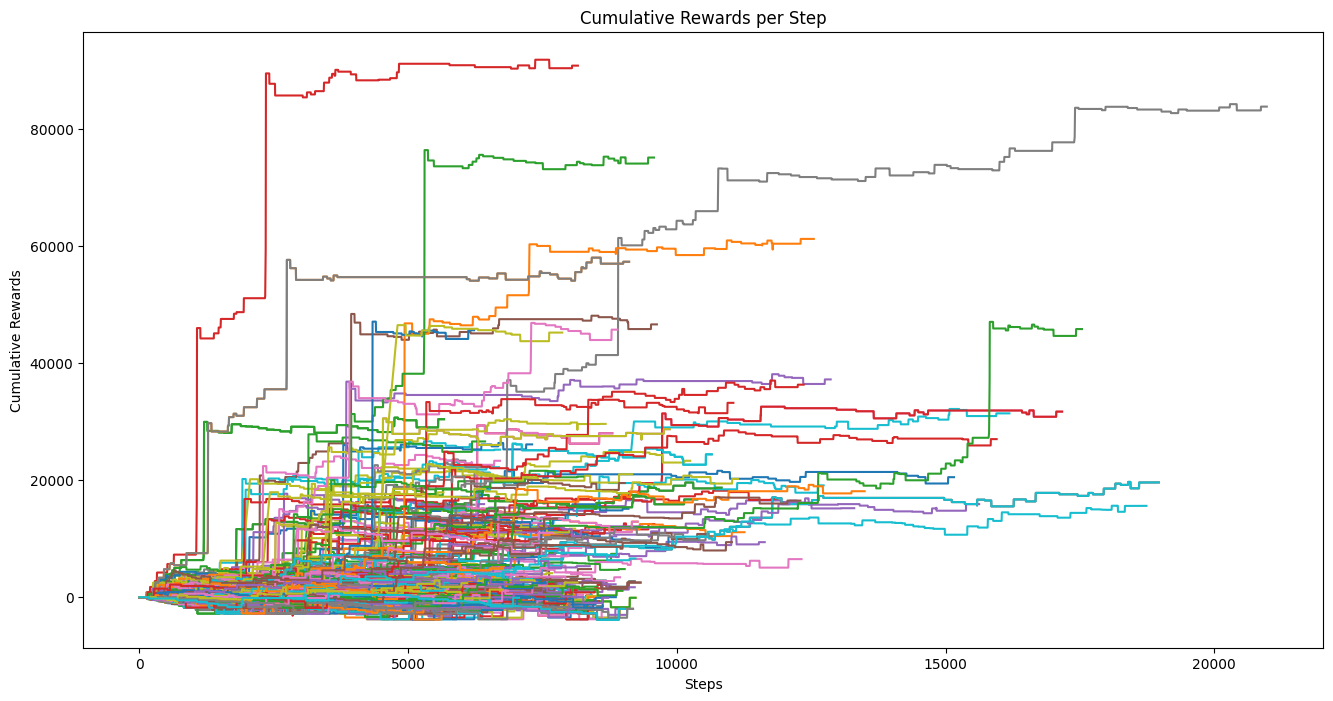

In [19]:
eval_plots_all(image_list)

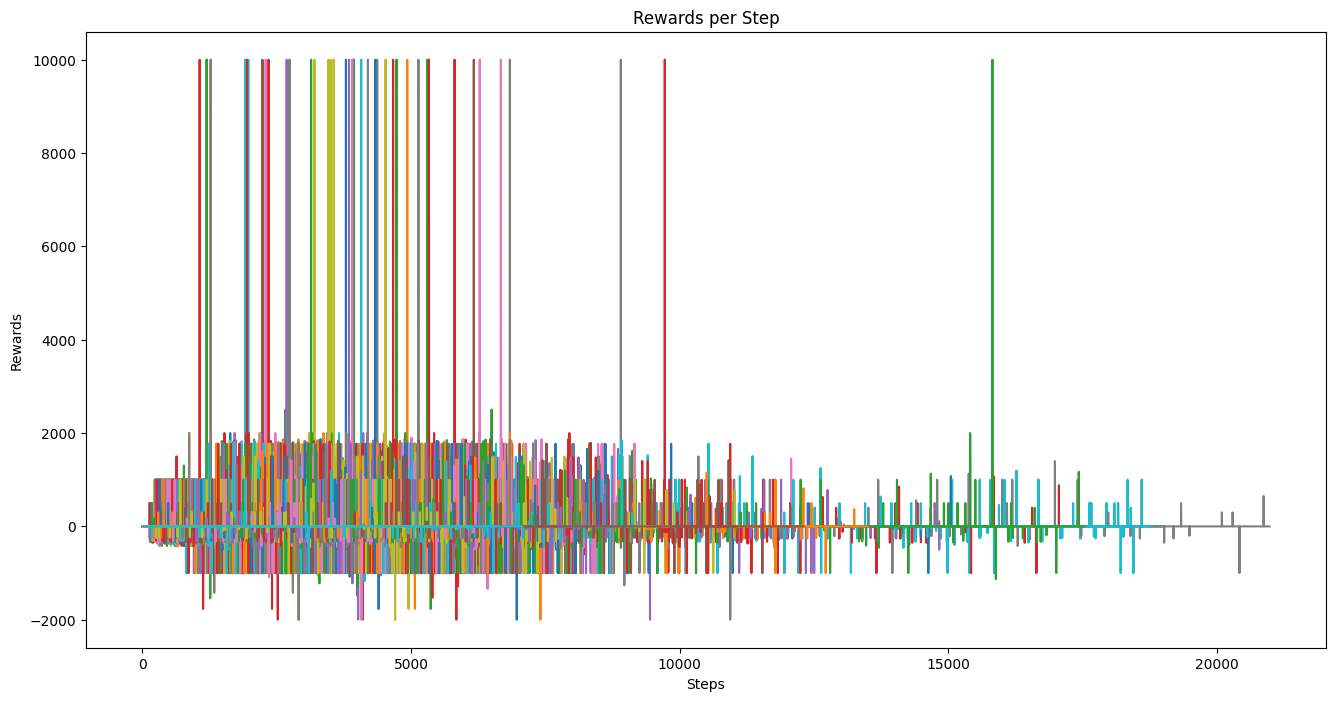

In [20]:
eval_plots_all(image_list, all_rewards=True)

In [21]:
image_dict_save = save_images_as_dict(image_list=image_list)
save(image_dict_save, './results/baseline_test_1_eval_images_no_train.pkl.gz')

In [26]:
np.random.seed(2)
op1 =  [

        {
        'policy': 'MlpPolicy',
        'buffer_size': 500_000,
        'seed': np.random.randint(1, 1000)
        }
        for i in range(5)
       ]

np.random.seed(2)
op2 =  [

        {
        'policy': 'CnnPolicy',
        'buffer_size': 500_000,
        'seed': np.random.randint(1, 1000)
        }
        for i in range(5)
       ]

all_model_ops = op1 + op2
all_model_ops


[{'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 169},
 {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 528},
 {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 494},
 {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 585},
 {'policy': 'MlpPolicy', 'buffer_size': 500000, 'seed': 535},
 {'policy': 'CnnPolicy', 'buffer_size': 500000, 'seed': 169},
 {'policy': 'CnnPolicy', 'buffer_size': 500000, 'seed': 528},
 {'policy': 'CnnPolicy', 'buffer_size': 500000, 'seed': 494},
 {'policy': 'CnnPolicy', 'buffer_size': 500000, 'seed': 585},
 {'policy': 'CnnPolicy', 'buffer_size': 500000, 'seed': 535}]

In [27]:
total_time_steps = [10_000, 20_000, 40_000, 80_000, 160_000, 320_000, 640_000, 1_000_000]
n_eval_episodes = 10
recorder_2 = {}
SAVE_DIR = './results/baseline_test_2_eval.pkl'
image_list = []

total_trials = len(total_time_steps) * len(all_model_ops)

print(total_trials)

80


In [28]:
trial = 1

In [29]:
for total_timesteps in total_time_steps:
    for model_ops in all_model_ops:

            print(f'Trial: {trial} out of {total_trials}')

            mean, std, total, time_in_minutes, info = train_model_dqn(StreetFighter,
                                                                      model_ops,
                                                                      total_timesteps=total_timesteps,
                                                                      n_eval_episodes=n_eval_episodes,
                                                                      ev_func = 'alt',
                                                                      plot=True, 
                                                                      verbose = 0)

            image_list.append(info)
            save_episode_plots(info, './results/images', trial=trial)

            steps = [info[i][0][-1] for i in range(10)]
            mean_steps = np.mean(steps)

            results_dict = {'total_timesteps':total_timesteps,
                            'mean':mean,
                            'std':std,
                            'total':total,
                            'time in minutes': time_in_minutes,
                            'mean_steps':mean_steps}

            add_to_recorder(recorder_2, results_dict)
            add_to_recorder(recorder_2, model_ops)

            if trial % 8 == 0:
                results_df = pd.DataFrame.from_dict(recorder_2)
                results_df.to_pickle(SAVE_DIR)
                print(f'Results saved to: {SAVE_DIR}')

            trial += 1

            policy = model_ops['policy']
            seed = model_ops['seed']
            print(f'Total_timesteps: {total_timesteps}, policy: {policy}, seed: {seed}')
            print(f'All episode mean rewards: {mean}')
            print(f'Train and evaluation time in minutes:{time_in_minutes}')
            print()

Trial: 1 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:18<00:00,  7.88s/it]


saving image to ./results/images/trial_1.svg
Total_timesteps: 10000, policy: MlpPolicy, seed: 169
All episode mean rewards: 6720.0
Train and evaluation time in minutes:1.6744

Trial: 2 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:13<00:00,  7.31s/it]


saving image to ./results/images/trial_2.svg
Total_timesteps: 10000, policy: MlpPolicy, seed: 528
All episode mean rewards: 4670.0
Train and evaluation time in minutes:1.5699

Trial: 3 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:27<00:00,  8.71s/it]


saving image to ./results/images/trial_3.svg
Total_timesteps: 10000, policy: MlpPolicy, seed: 494
All episode mean rewards: 6770.0
Train and evaluation time in minutes:1.7972

Trial: 4 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:34<00:00,  9.44s/it]


saving image to ./results/images/trial_4.svg
Total_timesteps: 10000, policy: MlpPolicy, seed: 585
All episode mean rewards: 4850.0
Train and evaluation time in minutes:1.9195

Trial: 5 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:34<00:00,  9.48s/it]


saving image to ./results/images/trial_5.svg
Total_timesteps: 10000, policy: MlpPolicy, seed: 535
All episode mean rewards: 12770.0
Train and evaluation time in minutes:1.9358

Trial: 6 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [02:26<00:00, 14.62s/it]


saving image to ./results/images/trial_6.svg
Total_timesteps: 10000, policy: CnnPolicy, seed: 169
All episode mean rewards: 22520.0
Train and evaluation time in minutes:2.9673

Trial: 7 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:33<00:00,  9.36s/it]


saving image to ./results/images/trial_7.svg
Total_timesteps: 10000, policy: CnnPolicy, seed: 528
All episode mean rewards: 1380.0
Train and evaluation time in minutes:2.0789

Trial: 8 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [03:39<00:00, 21.99s/it]


saving image to ./results/images/trial_8.svg
Results saved to: ./results/baseline_test_2_eval.pkl
Total_timesteps: 10000, policy: CnnPolicy, seed: 494
All episode mean rewards: 40360.0
Train and evaluation time in minutes:4.1911

Trial: 9 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [02:43<00:00, 16.31s/it]


saving image to ./results/images/trial_9.svg
Total_timesteps: 10000, policy: CnnPolicy, seed: 585
All episode mean rewards: 11990.0
Train and evaluation time in minutes:3.2353

Trial: 10 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [02:08<00:00, 12.87s/it]


saving image to ./results/images/trial_10.svg
Total_timesteps: 10000, policy: CnnPolicy, seed: 535
All episode mean rewards: 8620.0
Train and evaluation time in minutes:2.6583

Trial: 11 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [02:00<00:00, 12.05s/it]


saving image to ./results/images/trial_11.svg
Total_timesteps: 20000, policy: MlpPolicy, seed: 169
All episode mean rewards: 22480.0
Train and evaluation time in minutes:2.7135

Trial: 12 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:52<00:00, 11.30s/it]


saving image to ./results/images/trial_12.svg
Total_timesteps: 20000, policy: MlpPolicy, seed: 528
All episode mean rewards: 19630.0
Train and evaluation time in minutes:2.5692

Trial: 13 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [02:08<00:00, 12.84s/it]


saving image to ./results/images/trial_13.svg
Total_timesteps: 20000, policy: MlpPolicy, seed: 494
All episode mean rewards: 33730.0
Train and evaluation time in minutes:2.8278

Trial: 14 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:39<00:00, 10.00s/it]


saving image to ./results/images/trial_14.svg
Total_timesteps: 20000, policy: MlpPolicy, seed: 585
All episode mean rewards: 17260.0
Train and evaluation time in minutes:2.3563

Trial: 15 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:24<00:00,  8.45s/it]


saving image to ./results/images/trial_15.svg
Total_timesteps: 20000, policy: MlpPolicy, seed: 535
All episode mean rewards: 7840.0
Train and evaluation time in minutes:2.1166

Trial: 16 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:57<00:00, 11.71s/it]


saving image to ./results/images/trial_16.svg
Results saved to: ./results/baseline_test_2_eval.pkl
Total_timesteps: 20000, policy: CnnPolicy, seed: 169
All episode mean rewards: 8530.0
Train and evaluation time in minutes:3.012

Trial: 17 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:50<00:00, 11.04s/it]


saving image to ./results/images/trial_17.svg
Total_timesteps: 20000, policy: CnnPolicy, seed: 528
All episode mean rewards: 12620.0
Train and evaluation time in minutes:2.8736

Trial: 18 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:43<00:00, 10.32s/it]


saving image to ./results/images/trial_18.svg
Total_timesteps: 20000, policy: CnnPolicy, seed: 494
All episode mean rewards: 4670.0
Train and evaluation time in minutes:2.7499

Trial: 19 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:27<00:00,  8.73s/it]


saving image to ./results/images/trial_19.svg
Total_timesteps: 20000, policy: CnnPolicy, seed: 585
All episode mean rewards: 4180.0
Train and evaluation time in minutes:2.4919

Trial: 20 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:38<00:00,  9.82s/it]


saving image to ./results/images/trial_20.svg
Total_timesteps: 20000, policy: CnnPolicy, seed: 535
All episode mean rewards: 2280.0
Train and evaluation time in minutes:2.6672

Trial: 21 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [02:34<00:00, 15.50s/it]


saving image to ./results/images/trial_21.svg
Total_timesteps: 40000, policy: MlpPolicy, seed: 169
All episode mean rewards: 39330.0
Train and evaluation time in minutes:3.9663

Trial: 22 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:12<00:00,  7.27s/it]


saving image to ./results/images/trial_22.svg
Total_timesteps: 40000, policy: MlpPolicy, seed: 528
All episode mean rewards: 3750.0
Train and evaluation time in minutes:2.5942

Trial: 23 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [02:14<00:00, 13.40s/it]


saving image to ./results/images/trial_23.svg
Total_timesteps: 40000, policy: MlpPolicy, seed: 494
All episode mean rewards: 29600.0
Train and evaluation time in minutes:3.617

Trial: 24 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:53<00:00, 11.32s/it]


saving image to ./results/images/trial_24.svg
Results saved to: ./results/baseline_test_2_eval.pkl
Total_timesteps: 40000, policy: MlpPolicy, seed: 585
All episode mean rewards: 27780.0
Train and evaluation time in minutes:3.2694

Trial: 25 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:54<00:00, 11.47s/it]


saving image to ./results/images/trial_25.svg
Total_timesteps: 40000, policy: MlpPolicy, seed: 535
All episode mean rewards: 22620.0
Train and evaluation time in minutes:3.2961

Trial: 26 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:27<00:00,  8.79s/it]


saving image to ./results/images/trial_26.svg
Total_timesteps: 40000, policy: CnnPolicy, seed: 169
All episode mean rewards: 5070.0
Train and evaluation time in minutes:3.5207

Trial: 27 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:58<00:00, 11.87s/it]


saving image to ./results/images/trial_27.svg
Total_timesteps: 40000, policy: CnnPolicy, seed: 528
All episode mean rewards: 18290.0
Train and evaluation time in minutes:4.0332

Trial: 28 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:54<00:00, 11.49s/it]


saving image to ./results/images/trial_28.svg
Total_timesteps: 40000, policy: CnnPolicy, seed: 494
All episode mean rewards: 3550.0
Train and evaluation time in minutes:3.9667

Trial: 29 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [03:06<00:00, 18.61s/it]


saving image to ./results/images/trial_29.svg
Total_timesteps: 40000, policy: CnnPolicy, seed: 585
All episode mean rewards: 33770.0
Train and evaluation time in minutes:5.1558

Trial: 30 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:40<00:00, 10.05s/it]


saving image to ./results/images/trial_30.svg
Total_timesteps: 40000, policy: CnnPolicy, seed: 535
All episode mean rewards: 5270.0
Train and evaluation time in minutes:3.7362

Trial: 31 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:55<00:00, 11.50s/it]


saving image to ./results/images/trial_31.svg
Total_timesteps: 80000, policy: MlpPolicy, seed: 169
All episode mean rewards: 17700.0
Train and evaluation time in minutes:4.7007

Trial: 32 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:44<00:00, 10.49s/it]


saving image to ./results/images/trial_32.svg
Results saved to: ./results/baseline_test_2_eval.pkl
Total_timesteps: 80000, policy: MlpPolicy, seed: 528
All episode mean rewards: 16410.0
Train and evaluation time in minutes:4.5624

Trial: 33 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:34<00:00,  9.48s/it]


saving image to ./results/images/trial_33.svg
Total_timesteps: 80000, policy: MlpPolicy, seed: 494
All episode mean rewards: 8770.0
Train and evaluation time in minutes:4.3491

Trial: 34 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [02:19<00:00, 13.92s/it]


saving image to ./results/images/trial_34.svg
Total_timesteps: 80000, policy: MlpPolicy, seed: 585
All episode mean rewards: 34820.0
Train and evaluation time in minutes:5.108

Trial: 35 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:16<00:00,  7.68s/it]


saving image to ./results/images/trial_35.svg
Total_timesteps: 80000, policy: MlpPolicy, seed: 535
All episode mean rewards: 5840.0
Train and evaluation time in minutes:4.0647

Trial: 36 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:55<00:00, 11.55s/it]


saving image to ./results/images/trial_36.svg
Total_timesteps: 80000, policy: CnnPolicy, seed: 169
All episode mean rewards: 14420.0
Train and evaluation time in minutes:6.0431

Trial: 37 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [02:19<00:00, 13.92s/it]


saving image to ./results/images/trial_37.svg
Total_timesteps: 80000, policy: CnnPolicy, seed: 528
All episode mean rewards: 17370.0
Train and evaluation time in minutes:6.4501

Trial: 38 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:50<00:00, 11.02s/it]


saving image to ./results/images/trial_38.svg
Total_timesteps: 80000, policy: CnnPolicy, seed: 494
All episode mean rewards: 4260.0
Train and evaluation time in minutes:5.9358

Trial: 39 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 6.87GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [01:40<00:00, 10.03s/it]


saving image to ./results/images/trial_39.svg
Total_timesteps: 80000, policy: CnnPolicy, seed: 585
All episode mean rewards: 4780.0
Train and evaluation time in minutes:5.8157

Trial: 40 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 7.01GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [01:50<00:00, 11.05s/it]


saving image to ./results/images/trial_40.svg
Results saved to: ./results/baseline_test_2_eval.pkl
Total_timesteps: 80000, policy: CnnPolicy, seed: 535
All episode mean rewards: 8060.0
Train and evaluation time in minutes:5.9492

Trial: 41 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:25<00:00,  8.52s/it]


saving image to ./results/images/trial_41.svg
Total_timesteps: 160000, policy: MlpPolicy, seed: 169
All episode mean rewards: 6660.0
Train and evaluation time in minutes:6.9828

Trial: 42 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 6.85GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [01:49<00:00, 10.91s/it]


saving image to ./results/images/trial_42.svg
Total_timesteps: 160000, policy: MlpPolicy, seed: 528
All episode mean rewards: 17600.0
Train and evaluation time in minutes:7.3731

Trial: 43 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 6.72GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [01:18<00:00,  7.82s/it]


saving image to ./results/images/trial_43.svg
Total_timesteps: 160000, policy: MlpPolicy, seed: 494
All episode mean rewards: 3050.0
Train and evaluation time in minutes:6.8007

Trial: 44 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 6.69GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [01:16<00:00,  7.61s/it]


saving image to ./results/images/trial_44.svg
Total_timesteps: 160000, policy: MlpPolicy, seed: 585
All episode mean rewards: 3040.0
Train and evaluation time in minutes:6.7726

Trial: 45 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 6.64GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [02:22<00:00, 14.21s/it]


saving image to ./results/images/trial_45.svg
Total_timesteps: 160000, policy: MlpPolicy, seed: 535
All episode mean rewards: 31430.0
Train and evaluation time in minutes:7.9718

Trial: 46 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 7.00GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [01:36<00:00,  9.63s/it]


saving image to ./results/images/trial_46.svg
Total_timesteps: 160000, policy: CnnPolicy, seed: 169
All episode mean rewards: 4500.0
Train and evaluation time in minutes:9.8325

Trial: 47 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:32<00:00,  9.21s/it]


saving image to ./results/images/trial_47.svg
Total_timesteps: 160000, policy: CnnPolicy, seed: 528
All episode mean rewards: 9350.0
Train and evaluation time in minutes:9.7164

Trial: 48 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:37<00:00,  9.70s/it]


saving image to ./results/images/trial_48.svg
Results saved to: ./results/baseline_test_2_eval.pkl
Total_timesteps: 160000, policy: CnnPolicy, seed: 494
All episode mean rewards: 1700.0
Train and evaluation time in minutes:9.7957

Trial: 49 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:45<00:00, 10.55s/it]


saving image to ./results/images/trial_49.svg
Total_timesteps: 160000, policy: CnnPolicy, seed: 585
All episode mean rewards: 2490.0
Train and evaluation time in minutes:9.7622

Trial: 50 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [02:34<00:00, 15.44s/it]


saving image to ./results/images/trial_50.svg
Total_timesteps: 160000, policy: CnnPolicy, seed: 535
All episode mean rewards: 26830.0
Train and evaluation time in minutes:10.6065

Trial: 51 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 6.80GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [01:38<00:00,  9.86s/it]


saving image to ./results/images/trial_51.svg
Total_timesteps: 320000, policy: MlpPolicy, seed: 169
All episode mean rewards: 9370.0
Train and evaluation time in minutes:12.4231

Trial: 52 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 6.75GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [01:18<00:00,  7.87s/it]


saving image to ./results/images/trial_52.svg
Total_timesteps: 320000, policy: MlpPolicy, seed: 528
All episode mean rewards: 10730.0
Train and evaluation time in minutes:12.0971

Trial: 53 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 6.71GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [01:25<00:00,  8.51s/it]


saving image to ./results/images/trial_53.svg
Total_timesteps: 320000, policy: MlpPolicy, seed: 494
All episode mean rewards: 8210.0
Train and evaluation time in minutes:12.2135

Trial: 54 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 6.66GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [01:21<00:00,  8.13s/it]


saving image to ./results/images/trial_54.svg
Total_timesteps: 320000, policy: MlpPolicy, seed: 585
All episode mean rewards: 1250.0
Train and evaluation time in minutes:12.114

Trial: 55 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:09<00:00,  6.91s/it]


saving image to ./results/images/trial_55.svg
Total_timesteps: 320000, policy: MlpPolicy, seed: 535
All episode mean rewards: 5030.0
Train and evaluation time in minutes:11.9277

Trial: 56 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 6.62GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [01:18<00:00,  7.86s/it]


saving image to ./results/images/trial_56.svg
Results saved to: ./results/baseline_test_2_eval.pkl
Total_timesteps: 320000, policy: CnnPolicy, seed: 169
All episode mean rewards: 4740.0
Train and evaluation time in minutes:17.3997

Trial: 57 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 6.59GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [01:25<00:00,  8.59s/it]


saving image to ./results/images/trial_57.svg
Total_timesteps: 320000, policy: CnnPolicy, seed: 528
All episode mean rewards: 7370.0
Train and evaluation time in minutes:17.584

Trial: 58 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 6.27GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [01:31<00:00,  9.18s/it]


saving image to ./results/images/trial_58.svg
Total_timesteps: 320000, policy: CnnPolicy, seed: 494
All episode mean rewards: 4310.0
Train and evaluation time in minutes:17.6013

Trial: 59 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 6.36GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [02:58<00:00, 17.87s/it]


saving image to ./results/images/trial_59.svg
Total_timesteps: 320000, policy: CnnPolicy, seed: 585
All episode mean rewards: 33320.0
Train and evaluation time in minutes:19.047

Trial: 60 out of 80


/s/chopin/g/under/delta27/cs445/cs_445_project_dqn/.venv/lib64/python3.9/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 7.06GB > 6.31GB
  warnings.warn(


Learning...
Evaluating...


100%|██████████| 10/10 [01:56<00:00, 11.60s/it]


saving image to ./results/images/trial_60.svg
Total_timesteps: 320000, policy: CnnPolicy, seed: 535
All episode mean rewards: 1940.0
Train and evaluation time in minutes:17.8726

Trial: 61 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:12<00:00,  7.26s/it]


saving image to ./results/images/trial_61.svg
Total_timesteps: 640000, policy: MlpPolicy, seed: 169
All episode mean rewards: 5550.0
Train and evaluation time in minutes:22.6543

Trial: 62 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:20<00:00,  8.05s/it]


saving image to ./results/images/trial_62.svg
Total_timesteps: 640000, policy: MlpPolicy, seed: 528
All episode mean rewards: 1280.0
Train and evaluation time in minutes:22.7932

Trial: 63 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:58<00:00, 11.82s/it]


saving image to ./results/images/trial_63.svg
Total_timesteps: 640000, policy: MlpPolicy, seed: 494
All episode mean rewards: 24570.0
Train and evaluation time in minutes:23.4555

Trial: 64 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:03<00:00,  6.31s/it]


saving image to ./results/images/trial_64.svg
Results saved to: ./results/baseline_test_2_eval.pkl
Total_timesteps: 640000, policy: MlpPolicy, seed: 585
All episode mean rewards: 1190.0
Train and evaluation time in minutes:22.5191

Trial: 65 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:51<00:00, 11.10s/it]


saving image to ./results/images/trial_65.svg
Total_timesteps: 640000, policy: MlpPolicy, seed: 535
All episode mean rewards: 24740.0
Train and evaluation time in minutes:23.2641

Trial: 66 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:39<00:00,  9.98s/it]


saving image to ./results/images/trial_66.svg
Total_timesteps: 640000, policy: CnnPolicy, seed: 169
All episode mean rewards: 640.0
Train and evaluation time in minutes:33.3948

Trial: 67 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [02:08<00:00, 12.86s/it]


saving image to ./results/images/trial_67.svg
Total_timesteps: 640000, policy: CnnPolicy, seed: 528
All episode mean rewards: 9040.0
Train and evaluation time in minutes:34.0952

Trial: 68 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:41<00:00, 10.17s/it]


saving image to ./results/images/trial_68.svg
Total_timesteps: 640000, policy: CnnPolicy, seed: 494
All episode mean rewards: 2900.0
Train and evaluation time in minutes:33.6258

Trial: 69 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [02:10<00:00, 13.04s/it]


saving image to ./results/images/trial_69.svg
Total_timesteps: 640000, policy: CnnPolicy, seed: 585
All episode mean rewards: 4120.0
Train and evaluation time in minutes:35.0012

Trial: 70 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:45<00:00, 10.55s/it]


saving image to ./results/images/trial_70.svg
Total_timesteps: 640000, policy: CnnPolicy, seed: 535
All episode mean rewards: 10220.0
Train and evaluation time in minutes:34.1137

Trial: 71 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:48<00:00, 10.83s/it]


saving image to ./results/images/trial_71.svg
Total_timesteps: 1000000, policy: MlpPolicy, seed: 169
All episode mean rewards: 17880.0
Train and evaluation time in minutes:35.3374

Trial: 72 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:43<00:00, 10.38s/it]


saving image to ./results/images/trial_72.svg
Results saved to: ./results/baseline_test_2_eval.pkl
Total_timesteps: 1000000, policy: MlpPolicy, seed: 528
All episode mean rewards: 17460.0
Train and evaluation time in minutes:35.3894

Trial: 73 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:11<00:00,  7.13s/it]


saving image to ./results/images/trial_73.svg
Total_timesteps: 1000000, policy: MlpPolicy, seed: 494
All episode mean rewards: 6900.0
Train and evaluation time in minutes:35.118

Trial: 74 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:28<00:00,  8.87s/it]


saving image to ./results/images/trial_74.svg
Total_timesteps: 1000000, policy: MlpPolicy, seed: 585
All episode mean rewards: 12530.0
Train and evaluation time in minutes:35.4315

Trial: 75 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:53<00:00, 11.31s/it]


saving image to ./results/images/trial_75.svg
Total_timesteps: 1000000, policy: MlpPolicy, seed: 535
All episode mean rewards: 18380.0
Train and evaluation time in minutes:36.0795

Trial: 76 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:38<00:00,  9.84s/it]


saving image to ./results/images/trial_76.svg
Total_timesteps: 1000000, policy: CnnPolicy, seed: 169
All episode mean rewards: 7250.0
Train and evaluation time in minutes:52.0295

Trial: 77 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:33<00:00,  9.31s/it]


saving image to ./results/images/trial_77.svg
Total_timesteps: 1000000, policy: CnnPolicy, seed: 528
All episode mean rewards: 2690.0
Train and evaluation time in minutes:51.8655

Trial: 78 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:53<00:00, 11.37s/it]


saving image to ./results/images/trial_78.svg
Total_timesteps: 1000000, policy: CnnPolicy, seed: 494
All episode mean rewards: 16480.0
Train and evaluation time in minutes:51.7291

Trial: 79 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [02:07<00:00, 12.80s/it]


saving image to ./results/images/trial_79.svg
Total_timesteps: 1000000, policy: CnnPolicy, seed: 585
All episode mean rewards: 12810.0
Train and evaluation time in minutes:51.902

Trial: 80 out of 80
Learning...
Evaluating...


100%|██████████| 10/10 [01:38<00:00,  9.88s/it]


saving image to ./results/images/trial_80.svg
Results saved to: ./results/baseline_test_2_eval.pkl
Total_timesteps: 1000000, policy: CnnPolicy, seed: 535
All episode mean rewards: 1730.0
Train and evaluation time in minutes:51.466



In [30]:
results_df = pd.DataFrame.from_dict(recorder_2)
results_df.to_pickle('./results/baseline_test_2_eval.pkl')
results_df.sort_values(('mean'), ascending=False).head(10)

,total_timesteps,mean,std,total,time in minutes,mean_steps,policy,buffer_size,seed
7,10000,40360.0,27125.346081,403600,4.1911,12783.6,CnnPolicy,500000,494
20,40000,39330.0,27196.656044,393300,3.9663,11915.1,MlpPolicy,500000,169
33,80000,34820.0,27600.717382,348200,5.1080,10751.9,MlpPolicy,500000,585
28,40000,33770.0,16517.508892,337700,5.1558,10851.5,CnnPolicy,500000,585
12,20000,33730.0,22163.124780,337300,2.8278,9942.1,MlpPolicy,500000,494
58,320000,33320.0,25058.563407,333200,19.0470,10596.4,CnnPolicy,500000,585
44,160000,31430.0,24881.521256,314300,7.9718,10995.6,MlpPolicy,500000,535
22,40000,29600.0,16535.235106,296000,3.6170,10369.1,MlpPolicy,500000,494
23,40000,27780.0,20848.923234,277800,3.2694,8650.1,MlpPolicy,500000,585
49,160000,26830.0,25205.675948,268300,10.6065,9193.3,CnnPolicy,500000,535


In [32]:
print('Mean: rewards, std, total rewards, time, and total steps for all policies.')
mean = pd.DataFrame(results_df[['mean', 'std', 'total', 'time in minutes', 'mean_steps']].mean())
mean = mean.transpose()
mean.columns = ['Mean rewards', 'Mean std', 'Mean total rewards', 'Mean time in minutes', 'Mean total steps']
mean

Mean: rewards, std, total rewards, time, and total steps for all policies.


,Mean rewards,Mean std,Mean total rewards,Mean time in minutes,Mean total steps
0,12082.625,12137.643537,120826.25,13.72124,7209.78


In [33]:
print('For Cnn Policy:')
cnn_df = results_df[results_df['policy'] == 'CnnPolicy']
mean = pd.DataFrame(cnn_df[['mean', 'std', 'total', 'time in minutes', 'mean_steps']].mean())
mean = mean.transpose()
mean.columns = ['Mean rewards', 'Mean std', 'Mean total rewards', 'Mean time in minutes', 'Mean total steps']
mean

For Cnn Policy:


,Mean rewards,Mean std,Mean total rewards,Mean time in minutes,Mean total steps
0,9910.5,9889.97777,99105.0,16.199317,6817.5975


In [34]:
print('For Mlp Policy:')
mlp_df = results_df[results_df['policy'] == 'MlpPolicy']
mean = pd.DataFrame(mlp_df[['mean', 'std', 'total', 'time in minutes', 'mean_steps']].mean())
mean = mean.transpose()
mean.columns = ['Mean rewards', 'Mean std', 'Mean total rewards', 'Mean time in minutes', 'Mean total steps']
mean

For Mlp Policy:


,Mean rewards,Mean std,Mean total rewards,Mean time in minutes,Mean total steps
0,14254.75,14385.309304,142547.5,11.243163,7601.9625


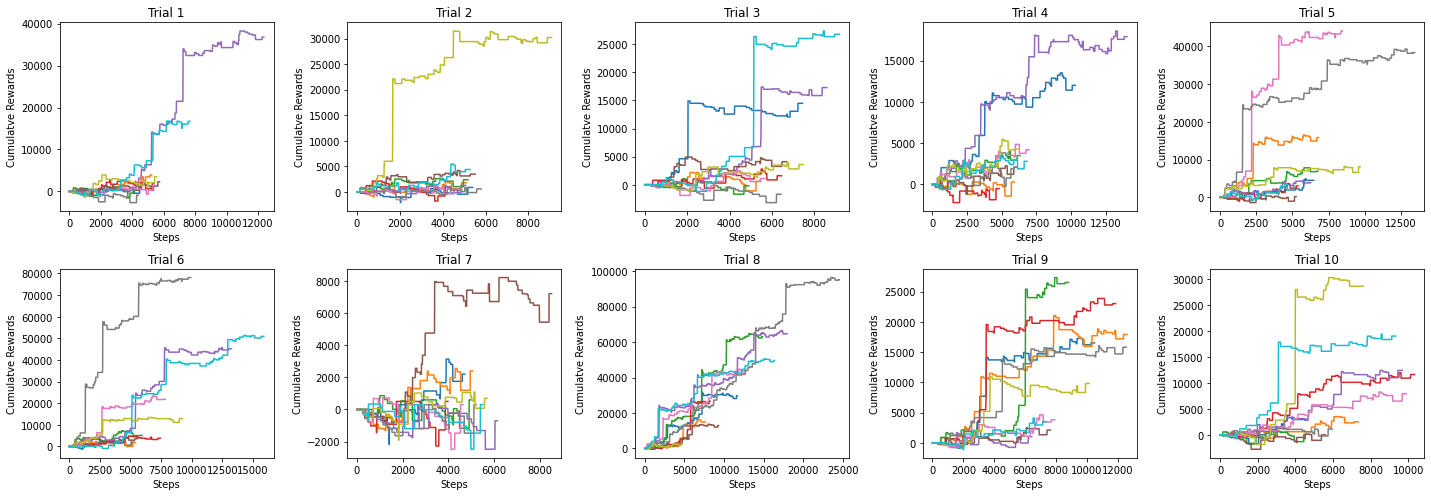

In [102]:
eval_subplots(num_plots = 10, image_list = image_list, num_cols=5, figsize=(20, 7))

In [63]:
plt.rcParams['figure.figsize'] = (16, 8)

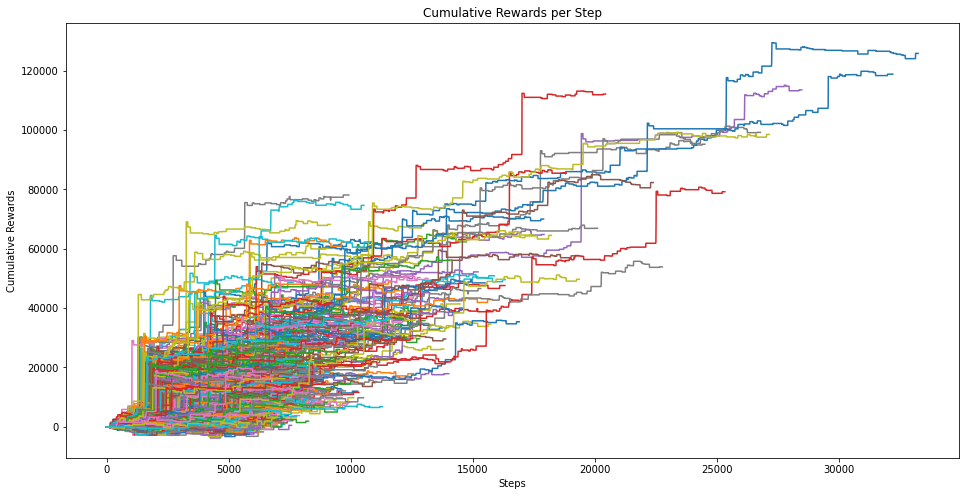

In [64]:
eval_plots_all(image_list)

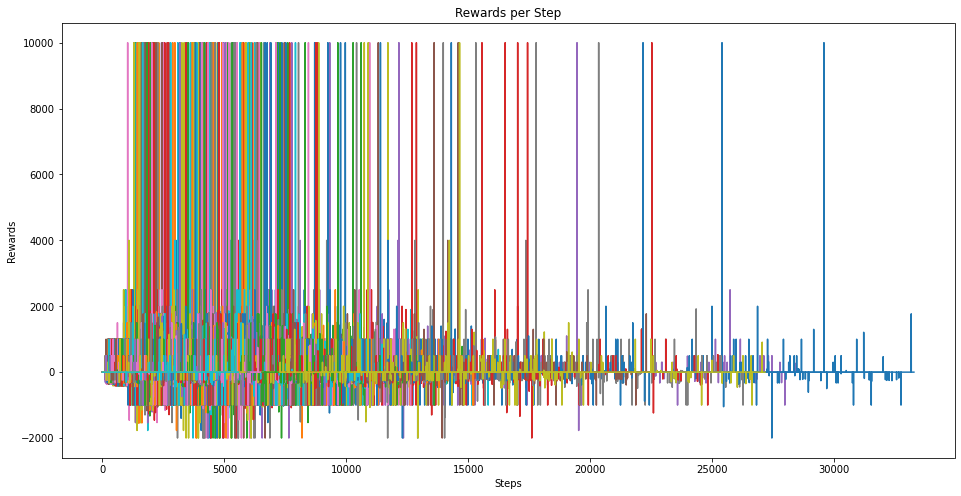

In [65]:
eval_plots_all(image_list, all_rewards=True)

In [91]:
policy_list

['MlpPolicy', 'CnnPolicy']

In [98]:
cnn_mean = []
cnn_std = []
cnn_mean_eval_steps = []

mlp_mean = []
mlp_std = []
mlp_mean_eval_steps = []

for n_timestep in total_time_steps:
        df = results_df[results_df['total_timesteps'] == n_timestep]

        for policy in policy_list:
                d_pol = df[df['policy'] == policy]
                df_mean = d_pol[['mean', 'std', 'total', 'time in minutes', 'mean_steps']].mean()

                if policy == 'CnnPolicy':
                        cnn_mean.append(df_mean['mean'])
                        cnn_std.append(df_mean['std'])
                        cnn_mean_eval_steps.append(df_mean['mean_steps'])
                else:
                        mlp_mean.append(df_mean['mean'])
                        mlp_std.append(df_mean['std'])
                        mlp_mean_eval_steps.append(df_mean['mean_steps'])


In [73]:
from matplotlib import pyplot as plt

In [83]:
plt.rcParams['figure.figsize'] = (10, 4)

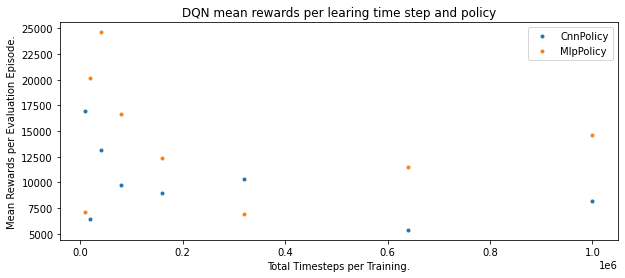

In [94]:
plt.plot(total_time_steps, cnn_mean, '.', label = 'CnnPolicy')
plt.plot(total_time_steps, mlp_mean, '.', label = 'MlpPolicy')
plt.title('DQN mean rewards per learing time step and policy')
plt.xlabel('Total Timesteps per Training.')
plt.ylabel('Mean Rewards per Evaluation Episode.')
plt.legend()
plt.show()

In [93]:
n_steps_list = [10000, 20000, 40000, 80000, 160000, 320000, 640000, 1000000]

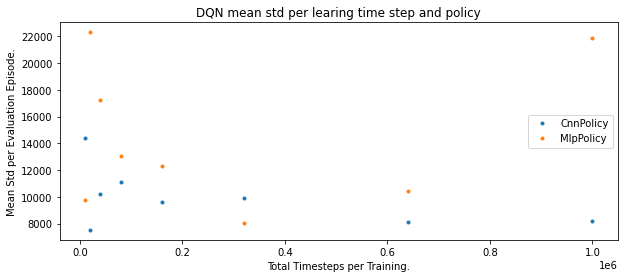

In [95]:
plt.plot(n_steps_list, cnn_std, '.', label = 'CnnPolicy')
plt.plot(n_steps_list, mlp_std, '.', label = 'MlpPolicy')
plt.title('DQN mean std per learing time step and policy')
plt.xlabel('Total Timesteps per Training.')
plt.ylabel('Mean Std per Evaluation Episode.')
plt.legend()
plt.show()

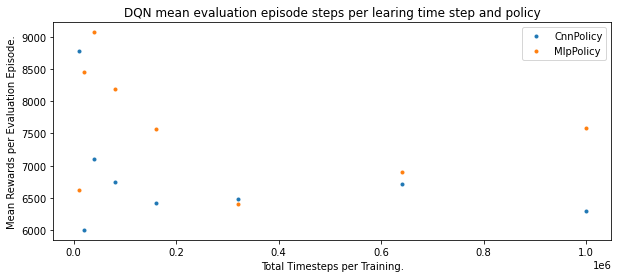

In [96]:
plt.plot(n_steps_list, cnn_mean_eval_steps, '.', label = 'CnnPolicy')
plt.plot(n_steps_list, mlp_mean_eval_steps, '.', label = 'MlpPolicy')
plt.title('DQN mean evaluation episode steps per learing time step and policy')
plt.xlabel('Total Timesteps per Training.')
plt.ylabel('Mean Rewards per Evaluation Episode.')
plt.legend()
plt.show()